In [4]:
%%markdown

# JSON Mini Project

### June 19, 2018
### Daniel Lee


# JSON Mini Project

### June 19, 2018
### Daniel Lee

In [8]:
%matplotlib inline

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas, Matplotlib, JSON

In [28]:
import json
from pandas.io.json import json_normalize

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [11]:
# load as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [12]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [13]:
%%markdown
# Problem 1: Find the 10 countries with most projects

# Problem 1: Find the 10 countries with most projects

In [14]:
top_ten_countries = json_df.countryname.value_counts().head(10)
top_ten_countries

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

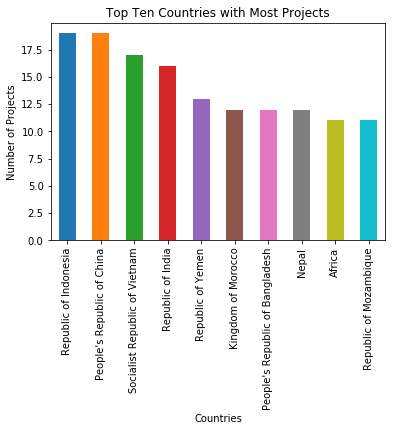

In [46]:
top_ten_countries.plot(kind = 'bar')
plt.title("Top Ten Countries with Most Projects")
plt.xlabel("Countries")
plt.ylabel("Number of Projects")
plt.show()

In [25]:
%%markdown
# Problem 2 Find the top 10 major project themes (using column 'mjtheme_namecode')

# Problem 2 Find the top 10 major project themes (using column 'mjtheme_namecode')

In [30]:
# load json data
data = json.load((open('data/world_bank_projects.json')))

# create dataframe from mjtheme_namecode column
mjtheme = json_normalize(data, 'mjtheme_namecode')
mjtheme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [31]:
# select all the rows with missing names
mjtheme_notnull = mjtheme[mjtheme.name != ""]

In [32]:
# create a dictionary. key is code and value is name
code_name_dict = mjtheme_notnull.set_index('code').to_dict()['name']
code_name_dict

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [33]:
# create empty dataframe to store top ten values
topten = pd.DataFrame()

# create a count column
topten['count'] = mjtheme_notnull.code.value_counts().head(10)

# reset index
topten.reset_index(inplace = True)

# create a name column with corresponding names for the top ten codes
topten['name'] = topten.apply(lambda x: code_name_dict[x['index']], axis = 1)

topten

,index,count,name
0,11,223,Environment and natural resources management
1,10,202,Rural development
2,8,197,Human development
3,2,184,Public sector governance
4,6,158,Social protection and risk management
5,4,130,Financial and private sector development
6,7,119,Social dev/gender/inclusion
7,5,72,Trade and integration
8,9,47,Urban development
9,1,33,Economic management


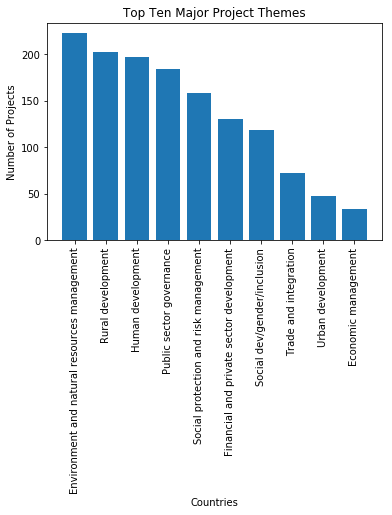

In [47]:
plt.bar(x = 'name', height = 'count', data = topten)
plt.xticks(rotation = 90)
plt.title("Top Ten Major Project Themes")
plt.xlabel("Countries")
plt.ylabel("Number of Projects")
plt.show()

In [148]:
%%markdown
# Problem 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# Problem 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [149]:
# create a copy of the data set
mjtheme_filled = mjtheme.copy()

# fill in the missing data by matching the code with the names using apply function and dictionary that was created previously
mjtheme_filled.loc[mjtheme_filled.name == "", 'name'] = mjtheme[mjtheme.name == ""].apply(
    lambda x: x['name'].replace("", code_name_dict[x['code']]), axis = 1)

In [150]:
mjtheme_filled.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
